In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Homeworks FDS/Progetto
%pwd

/content/drive/.shortcut-targets-by-id/1Vzw8m8Ha_VscaXjjIlDjZrQtp1m45M3N/Homeworks FDS/Progetto


'/content/drive/.shortcut-targets-by-id/1Vzw8m8Ha_VscaXjjIlDjZrQtp1m45M3N/Homeworks FDS/Progetto'

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.utils import make_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Setup of a dataset class to be used for training

In [ ]:
class MyDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_paths = []
        self.labels = []

        for label_dir in ['artificial', 'natural']:
            label = 0 if label_dir == 'artificial' else 1
            folder = os.path.join(root_dir, label_dir)
            for filename in os.listdir(folder):
                if filename.endswith(".png") or filename.endswith(".jpg"):
                    self.file_paths.append(os.path.join(folder, filename))
                    self.labels.append(label)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = MyDataset(root_dir='./dataset', transform=transform)

70% on train set, 20% on validation and 10% on test set

In [ ]:
train_size = int(0.7*len(dataset))
val_size = int(0.2*len(dataset))
test_size = len(dataset)-train_size-val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Test of dataset



tensor([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1])


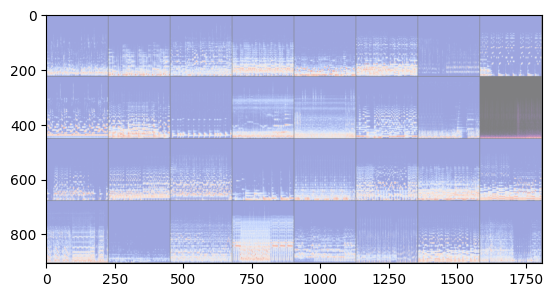

In [ ]:
def imshow(img):
    img = img/2 + 0.5
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))

data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(make_grid(images))
print(labels)